# PlaiCraft DSCI 100 Individual Planning

In this individual planning, I will be analyzing and visualizing data provided by Frank Wood's Computer Science research group for their vanilla survival MineCraft server, PlaiCraft, to prepare for the group aspect of the project where we will answer an agreed upon predictive question. The datasets provided were players.csv and sessions.csv.

### Data Description and Pre-Inspection

Before we start analyzing, here are a few details about the collection of the data, concluded from the datasets and PlaiCraft website:
 - From the sessions dataset, data was collected between May 1 - September 1, 2024
 - Study runs under approval from UBC's office of research ethics
 - Players can halt their data being collected if they'd like
 - Those 13 years old and under required guardian consent to collect their data
 - Data for each session was collected from when game browser opened to closed
 - Each server was monitored consistently
 - Sessions range from solo to multiplayer; but multiplayer was encouraged

After previewing both datasets, there are two NA values in players.csv in rows 159 and 197 and missing data in row 682 and 1020 of sessions.csv. One option could be to drop these rows, but there may be valuable information in the other variables of those rows, so I will decide to keep them and keep note of them for future summarizing and wrangling.

So, let's begin! First, let's load in the tidyverse, ggplot2, RColorBrewer, and lubridate R packages to use for future analysis.

In [2]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Inspecting the Datasets with R Functions and Summaries

Let's read in the two datasets and inspect what data we have to work with.

In [3]:
url_players <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/players.csv"
players_data <- read_csv(url_players)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set:

The "players.csv" has 7 variables and 196 observations, as listed above the dataframe (196x7). The variables, their data type, and description of what they represent are listed below:
1. `experience`: *chr (character)* - determines the "level" of the players' gaming experience as a Beginner, Amateur, Regular, Veteran, or Pro (the most experienced)
2. `subscribe`: *lgl (logical)* - indicated with TRUE for "yes" or FALSE for "no", determining whether or not the player is subscribed to PlaiCraft's newsletter
3. `hashedEmail`: *chr (character)* - email address of player, but in hashed form with a sequence of letters and numbers
4. `played_hours`: *dbl (double (decimal))* - how many hours the player played PlaiCraft for
5. `name`: *chr (character)* - first name of player
6. `gender`: *chr (character)* - gender of player
7. `age`: *dbl (double (decimal))* - age of player


There's an issue in the subscribe column. I assume it's based on subscription for the game's newsletter, as mentioned in one of the broad questions. However, there's nothing to verify this. Likewise, I assume the two datasets were collected during the same timespan as they were provided together. Furthermore, the order of the experience column is unclear. Usually the order from least to most experienced is the one listed above. Yet, there is no indication. As well, there was no information about how one could be classified as each experience and whether the player themselves categorized themself, in which may bring in bias.

#### Summary #1

In [4]:
experience_count <- players_data |>
                        group_by(experience) |>
                        summarize(count = n())

experience_summary <- experience_count |>
                        ungroup() |>
                        mutate(percent = count/sum(count) * 100) |>
                        mutate(percent = round(percent, 2))
experience_summary

experience,count,percent
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


##### Experience Summary:
- Amateur (largest portion) = 63 = 32.14%
- Beginner = 35 = 17.86%
- Pro (smallest portion) = 14 = 7.14%
- Regular = 36 = 18.37%
- Veteran = 48 = 24.49%

#### Summary #2

In [5]:
played_hours_summary <- players_data |>
                            summarize(mean = mean(played_hours, na.rm = TRUE),
                                      median = median(played_hours, na.rm = TRUE),
                                      sum = sum(played_hours, na.rm = TRUE),
                                      max = max(played_hours),
                                      min = min(played_hours)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))    
played_hours_summary                      

mean,median,sum,max,min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,1145.8,223.1,0


##### Played Hours Summary:
- Mean = 5.85 hours
- Median = 0.1 hours
- Sum = 1145.80 hours
- Max = 223.10 hours
- Min = 0 hours

#### Summary #3

In [6]:
subscribe_count <- players_data |>
                        group_by(subscribe) |>
                        summarize(count = n())

subscribe_summary <- subscribe_count |>
                        ungroup() |>
                        mutate(percent = count/sum(count) * 100) |>
                        mutate(percent = round(percent, 2))
subscribe_summary

subscribe,count,percent
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


##### Subscribe Summary:
- FALSE = 52 = 26.53%
- TRUE = 144 = 73.47%

#### Summary #4

In [7]:
gender_count <- players_data |>
                    group_by(gender) |>
                    summarize(count = n())

gender_summary <- gender_count |>
                        ungroup() |>
                        mutate(percent = count/sum(count) * 100) |>
                        mutate(percent = round(percent, 2))
gender_summary

gender,count,percent
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


##### Gender Summary:
- Agender = 2 = 1.02%
- Female = 37 = 18.88%
- Male (largest portion) = 124 = 63.27%
- Non-binary = 15 = 7.65%
- Other (smallest portion) = 1 = 0.51%
- Prefer not to say = 11 = 5.61%
- Two-spirited = 6 = 3.06%

#### Summary #5

In [8]:
age_summary <- players_data |>
                    summarize(mean = mean(Age, na.rm = TRUE),
                              median = median(Age, na.rm = TRUE),
                              max = max(Age, na.rm = TRUE),
                              min = min(Age, na.rm = TRUE)) |>
                    mutate(across(mean:min, ~ round(.x, 2)))    
age_summary   

mean,median,max,min
<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,58,9


##### Age Summary:
- Mean = 21.14 years old
- Median = 19 years old
- Oldest (max) = 58 years old
- Youngest (min) = 9 years old.

**Now, let's read in the sessions dataset!**

In [9]:
url_sessions <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set:
Indicated at the top of the dataframe, "sessions.csv" has 5 variables and 1535 observations (1535x5). The variables, their data type, and description of what they represent are listed below: 
1. `hashedEmail`: *chr (character)* - the players' email, but in hashed form
2. `start_time`: *chr (character)* - start time of players' gametime session in "dd/mm/yyyy" and "time (in 24 hour interval)"
4. `end_time`: *chr (character)* - end time of players' gametime session in "dd/mm/yyyy" and "time (in 24 hour interval)"
5. `original_start_time`: *dbl (double (decimal))* - players' start time in UNIX format (milliseconds)
6. `original_end_time`: *dbl (double (decimal))* - players' end time in UNIX format (milliseconds)


The only issue is the data type of the start_time and end_time columns. They are in a character data type, which is going to make it difficult to perform functions on if we wanted to use the times and treat them as numerical forms. There are the original_start_time and original_end_time variables which represent the start_time and end_time variables in a different format that is numeric. But, they are difficult to interpret and change.

The data is already tidy, but before we summarize, I will wrangle the data by separating the start_time and end_time column values so that I can change the time into a decimal data type in hours, and then make a new column for start time in hours as an integer. This will make it easier to use for later.

In [10]:
sessions_data_tidy <- sessions_data |>
                        separate(end_time, 
                                into = c("date_end", "end_time"),
                                sep = " ") |>
                        separate(start_time,
                                into = c("date_start", "start_time"),
                                sep = " ") |>
                        mutate(start_time = as.numeric(hm(start_time))/3600) |> #hm function is from the lubridate R package and extracts the time in seconds
                        mutate(end_time = as.numeric(hm(end_time))/3600) |> #we devide it by 3600 to get the time in hours
                        mutate(start_time_hr = as.integer(start_time)) |>
                        mutate(start_time_hr = start_time_hr %% 24) #%% will divide each value by 24 and output the remainder; we want this so that any 24 hour values = 0 on the 24 hour interval
sessions_data_tidy

hashedEmail,date_start,start_time,date_end,end_time,original_start_time,original_end_time,start_time_hr
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18.2000000,30/06/2024,18.400000,1.71977e+12,1.71977e+12,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23.5500000,17/06/2024,23.766667,1.71867e+12,1.71867e+12,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17.5666667,25/07/2024,17.950000,1.72193e+12,1.72193e+12,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,3.3666667,25/07/2024,3.966667,1.72188e+12,1.72188e+12,3
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16.0166667,25/05/2024,16.200000,1.71665e+12,1.71665e+12,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15.1333333,23/06/2024,17.166667,1.71916e+12,1.71916e+12,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,7.2000000,15/04/2024,7.350000,1.71317e+12,1.71317e+12,7
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,2.2166667,21/09/2024,2.500000,1.72688e+12,1.72689e+12,2
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,2.5166667,21/06/2024,2.816667,1.71894e+12,1.71894e+12,2


#### Summary #6

In [11]:
date_total <- sessions_data_tidy |>
                    group_by(date_start) |>
                    summarize(count = n()) |>
                    arrange(desc(count))

pull(head(date_total, 1))
pull(tail(date_total, 1))

[1] 38

[1] 1

We can assume that the highest number of sessions in one day was 38 and lowest was 1. Let's filter to see if there are any more days with these same counts.

In [12]:
date_summary <- date_total |>
                    filter(count %in% c(38, 1))

date_summary

date_start,count
<chr>,<int>
25/07/2024,38
07/09/2024,1
09/04/2024,1
10/06/2024,1
11/09/2024,1
12/07/2024,1
12/09/2024,1
15/07/2024,1
19/07/2024,1


##### Sessions in a Day Summary:
- Least active days were in July and September, with one in April and June as well = 1 session 
- Most popular day of playing was July 25, 2024 = 38 sessions

#### Summary #7

In [13]:
start_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(start_time, na.rm = TRUE),
                                      median = median(start_time, na.rm = TRUE),
                                      max = max(start_time, na.rm = TRUE),
                                      min = min(start_time, na.rm = TRUE)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))
start_time_summary

mean,median,max,min
<dbl>,<dbl>,<dbl>,<dbl>
10.69,6.53,23.98,0


##### Start Time Summary:
- Mean = 10.69 hours = 10:41am
- Median = 6.53 hours = 6:31am
- Latest (max) = 23.98 hours = 11:58pm
- Earliest (min) = 0 hours = 12:00am

#### Summary #8

In [14]:
end_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(end_time, na.rm = TRUE),
                                      median = median(end_time, na.rm = TRUE),
                                      max = max(end_time, na.rm = TRUE),
                                      min = min(end_time, na.rm = TRUE)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))
end_time_summary

mean,median,max,min
<dbl>,<dbl>,<dbl>,<dbl>
10.09,6.25,23.98,0


##### End Time Summary:
- Mean = 10.09 hours = 10:05am
- Median = 6.25 hours = 6:15am
- Latest (max) = 23.98 hours = 11:58pm
- Earliest (min) = 0 hours = 12:00am

##### I will also merge the two datasets together so that it will be more efficient and require less work for any future visualizations.

In [15]:
sessions_players_join <- merge(players_data, sessions_data_tidy, by = "hashedEmail", all = TRUE)
sessions_players_join

hashedEmail,experience,subscribe,played_hours,name,gender,Age,date_start,start_time,date_end,end_time,original_start_time,original_end_time,start_time_hr
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,23/05/2024,0.3666667,23/05/2024,1.1166667,1.71642e+12,1.71643e+12,0
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,22/05/2024,23.2000000,23/05/2024,0.2166667,1.71642e+12,1.71642e+12,23
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA,NA,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,28/06/2024,4.4666667,28/06/2024,4.9666667,1.71955e+12,1.71955e+12,4
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,19/09/2024,21.0166667,19/09/2024,21.2000000,1.72678e+12,1.72678e+12,21
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,3.6666667,30/08/2024,4.0666667,1.72499e+12,1.72499e+12,3
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,27/08/2024,19.3000000,27/08/2024,19.8666667,1.72479e+12,1.72479e+12,19
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,17.8166667,30/08/2024,18.8000000,1.72504e+12,1.72504e+12,17
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,31/08/2024,22.7333333,31/08/2024,23.3333333,1.72514e+12,1.72515e+12,22


### 2. The Question
Now that we have investigated our data, let's state the question.

The broad question being addressed: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts". 

With this, the specific predictive question I formulated is: 
##### Can player age and total sessions played predict the total hours of PlaiCraft a player will play so that we can target those "kinds" of players for recruiting efforts to collect large amounts of data?

### 3. Exploratory Data Analysis and Visualization


Let's create some exploratory visualizations to understand the data more and possibly seek out any helpful relationships. Visualizations make it much easier to interpret datasets and make large datasets into concise figures.

Some of the graphs provide information that is not as important for my specific question, but it's worth while to create them to further understand and explore both datasets as a whole. It may be needed for when I come together with my group as well.

#### Visualization #1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


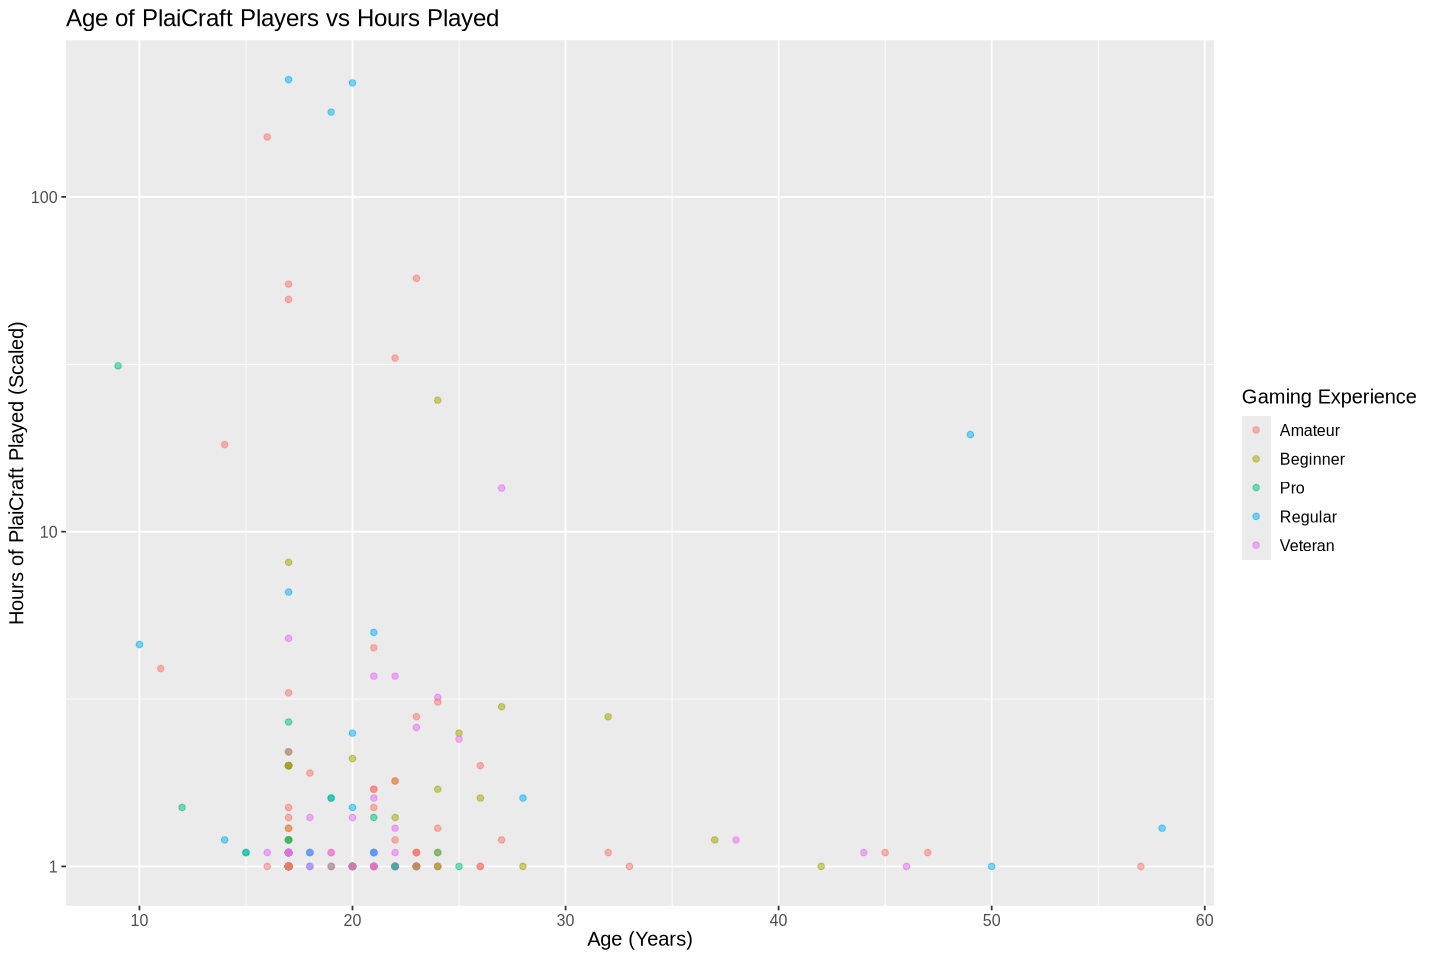

In [30]:
options(repr.plot.width = 12, repr.plot.height = 8)
played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours + 1, color = experience)) + #add +1 so that when we log our y axis, the 0 values won't be infinity
                            geom_point(alpha = 0.5) +
                            labs(x = "Age (Years)", y = "Hours of PlaiCraft Played (Scaled)", color = "Gaming Experience") +
                            ggtitle("Age of PlaiCraft Players vs Hours Played") +
                            scale_y_log10() +
                            theme(text = element_text(size = 12))
played_hours_age_plot

There doesn't seem to be any relationship between the age of the players and the hours of PlaiCraft played as the points are widespread and there is no clear trend. The points are pretty condensed near the bottom of the graph, with some outliers near the top half. The graph seems to insinuate that teens and young adults tend to play for greater amounts of hours, specifically ages around 18 - 20. This is not only seen by the outliers, but nearby the condensed area as well.

#### Visualization #2

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


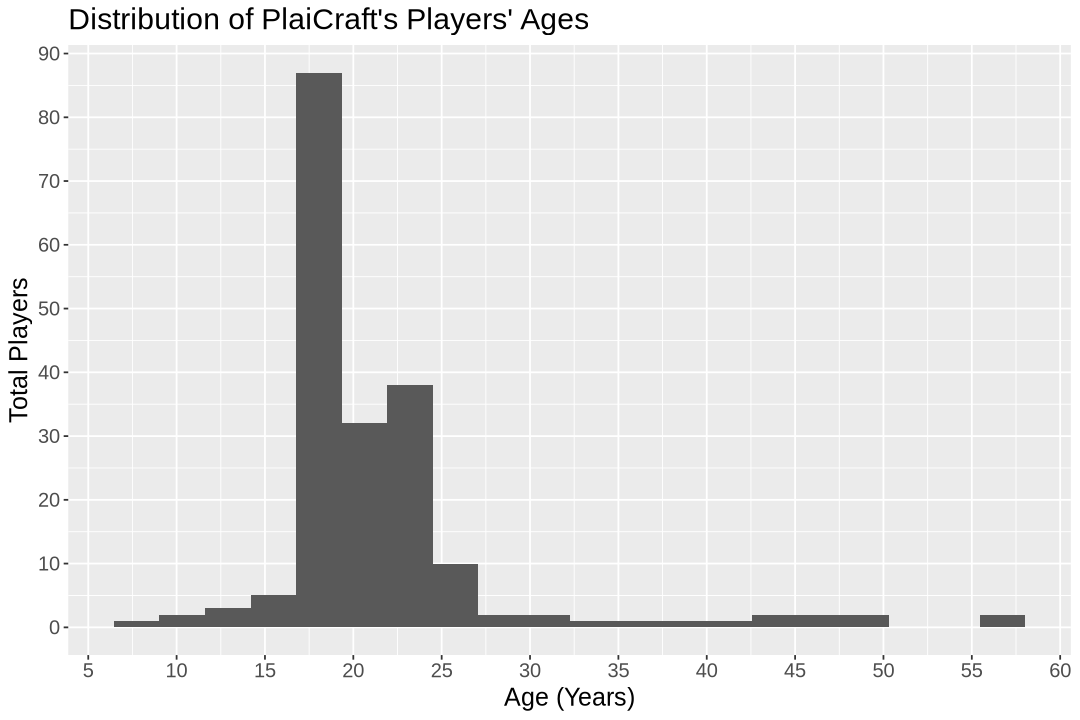

In [17]:
options(repr.plot.width = 9, repr.plot.height = 6)
age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram(bins = 20) +
                    labs(x = "Age (Years)", y = "Total Players") +
                    ggtitle("Distribution of PlaiCraft's Players' Ages") +
                    scale_x_continuous(breaks = seq(0, 65, by = 5)) +
                    scale_y_continuous(breaks = seq(0, 90, by = 10)) +
                    theme(text = element_text(size = 15))
age_histogram

In this visualization, we can see that the majority of PlaiCraft players in the dataset are approximately 17 years old. A lot of the players' ages are condensed around the teenager to young adult ages of 16 - 25. There are however, a few beyond this at the young children and older adult ages.

#### Visualization #3

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


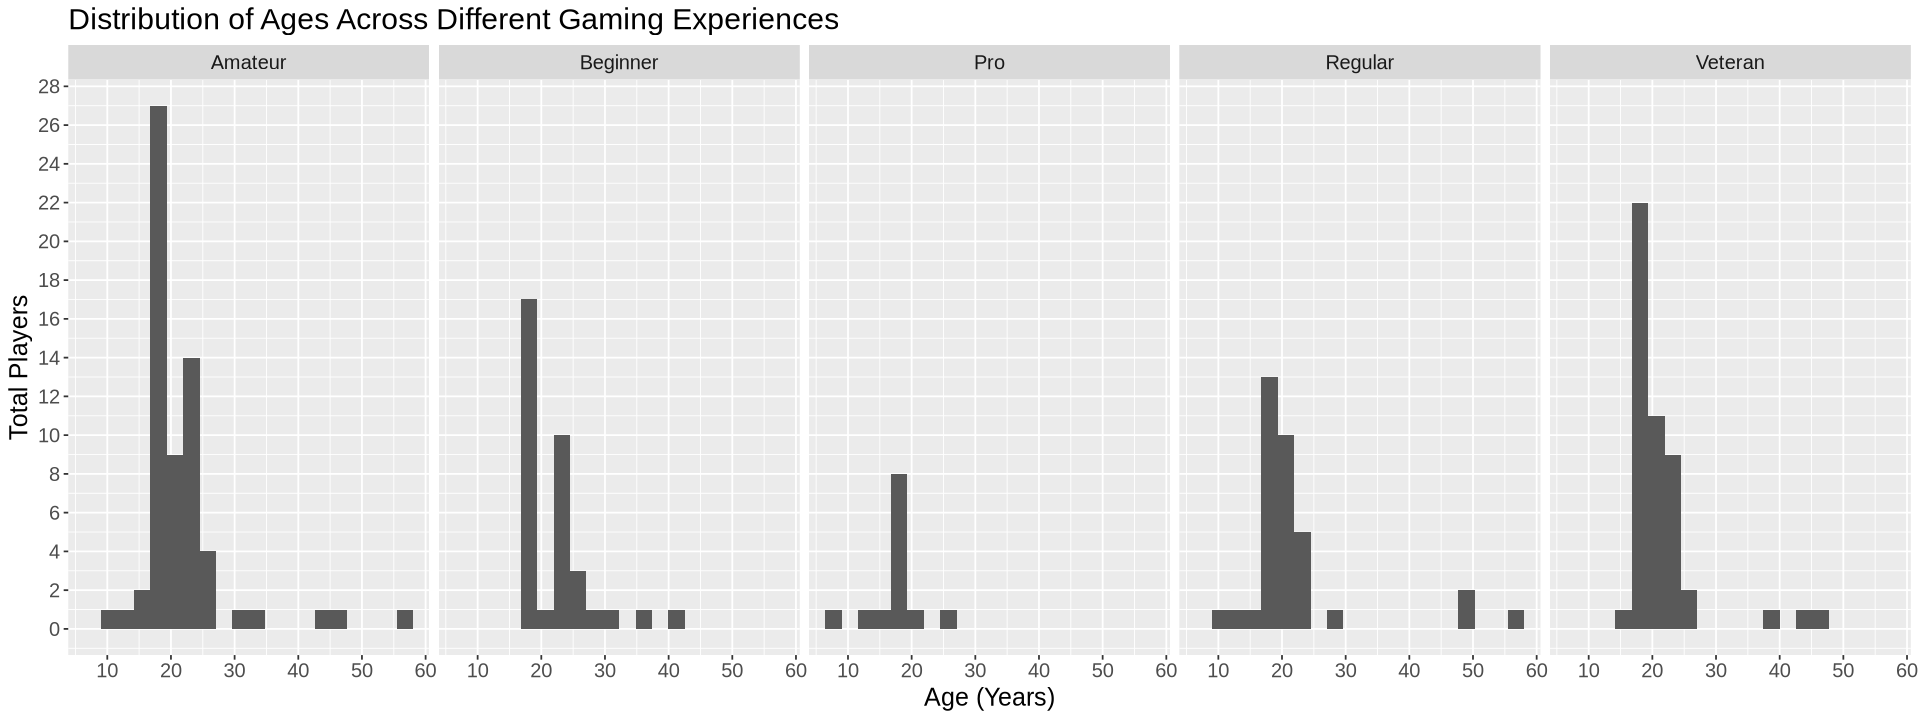

In [42]:
options(repr.plot.width = 16, repr.plot.height = 6)

experience_age_histogram <- age_histogram +
                                ggtitle("Distribution of Ages Across Different Gaming Experiences") +
                                scale_y_continuous(breaks = seq(0, 28, by = 2)) +
                                scale_x_continuous(breaks = seq(0, 60, by = 10)) +
                                facet_grid(cols = vars(experience))

experience_age_histogram

This is an extension of visualization #2, split by gaming experience. We can conclude that age does not correlate to gaming experience as in, just because a player is on the fairly younger side, it does not mean that they are automatically a beginner or amateur. They could be as equally a pro as 20-30 year olds as shown in the pro column. This also goes the same for older adults. Although many seem to be catergorized as amateur, there are definitely a few in veteran. However, that being said, as stated before, there's no explanation of how this category was collected. So, there could be some bias.

#### Visualization #4

`summarise()` has grouped output by 'hashedEmail', 'played_hours'. You can
override using the `.groups` argument.


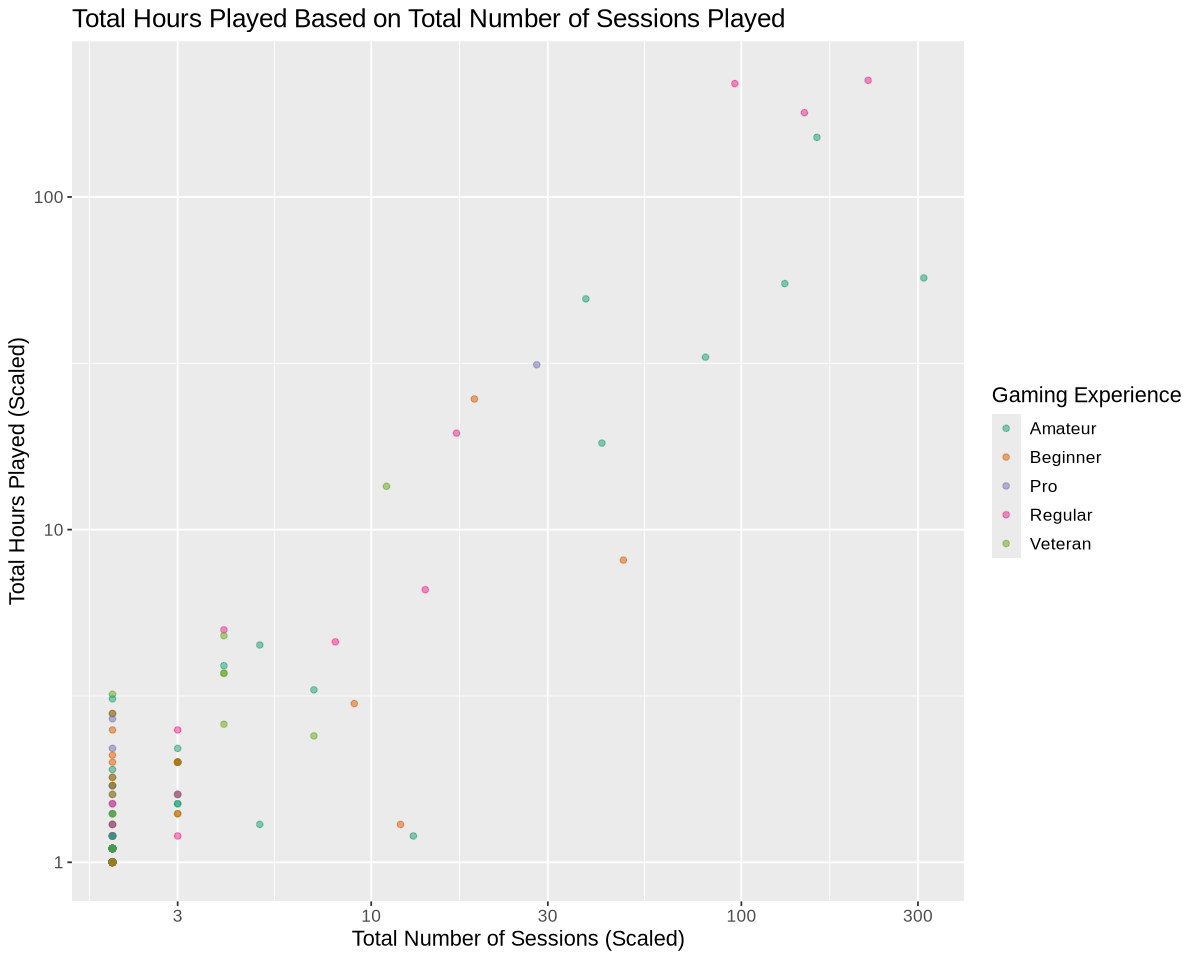

In [50]:
options(repr.plot.width = 10, repr.plot.height = 8)
sessions_hours_total <- sessions_players_join |>
                        select(hashedEmail, played_hours, experience) |>
                        group_by(hashedEmail, played_hours, experience) |>
                        summarize(count = n())

age_sessions_plot <- sessions_hours_total |>
                        ggplot(aes(x = count + 1, y = played_hours + 1, color = experience)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Total Number of Sessions (Scaled)", y = "Total Hours Played (Scaled)", colour = "Gaming Experience") +
                            ggtitle("Total Hours Played Based on Total Number of Sessions Played") +
                            scale_color_brewer(palette = "Dark2") +
                            scale_y_log10() +
                            scale_x_log10() +
                            theme(text = element_text(size = 13))
age_sessions_plot                        

From this visualization, we can see that there seems to be a positive relationship between the total number of sessions played and the total number of hours played. 

#### Visualization #5

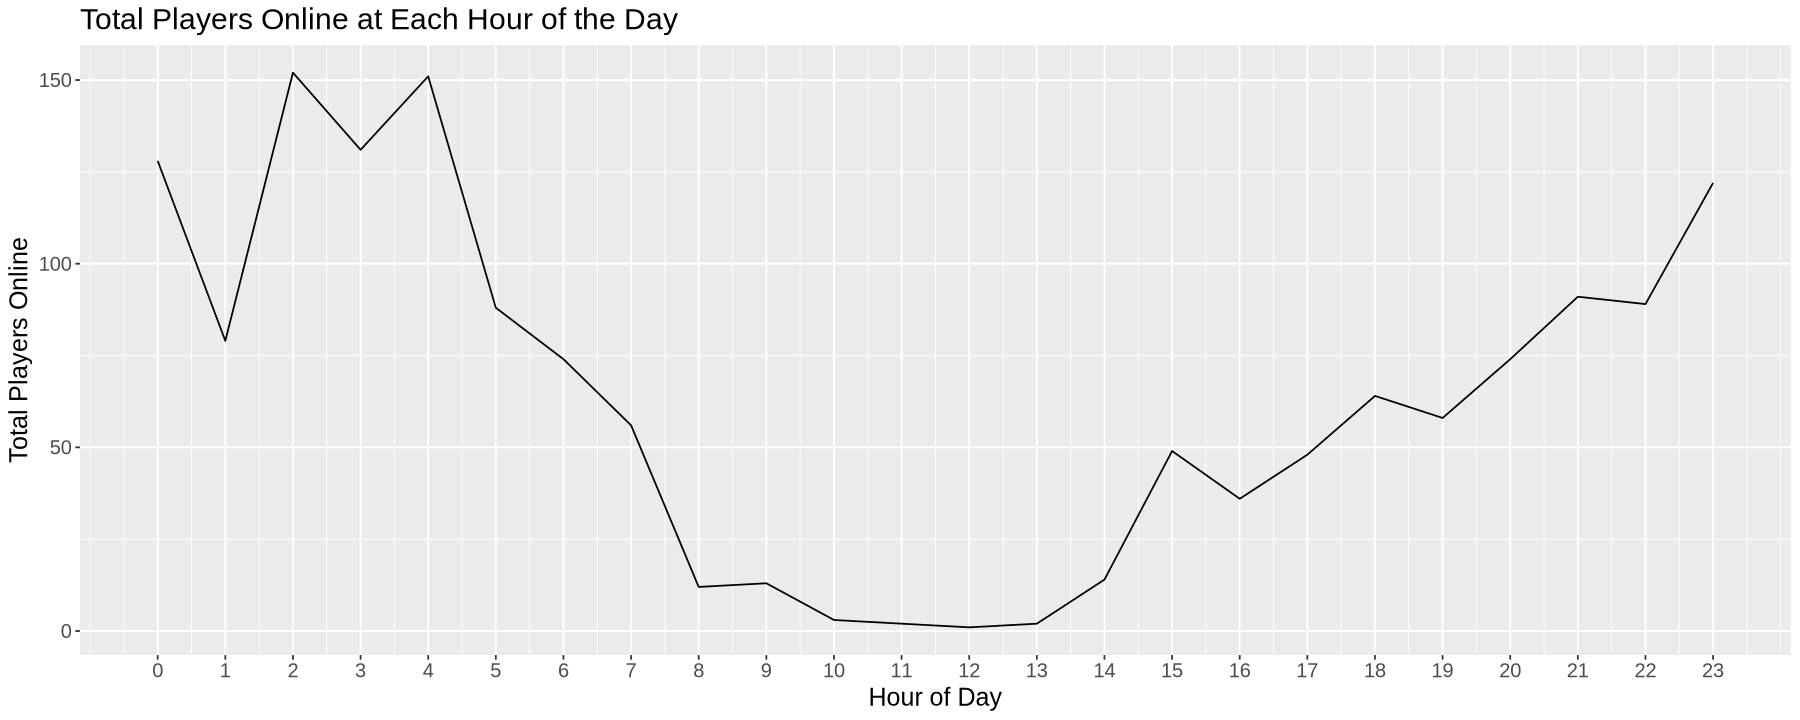

In [28]:
options(repr.plot.width = 15, repr.plot.height = 6)
start_time_players_total <- group_by(sessions_data_tidy, start_time_hr) |>
                                summarize(total_players = n())

start_time_players_line <- ggplot(start_time_players_total, aes(x = start_time_hr, y = total_players)) +
                                geom_line() +
                                scale_x_continuous(breaks = seq(0, 23)) +
                                labs(x = "Hour of Day", y = "Total Players Online") +
                                ggtitle("Total Players Online at Each Hour of the Day") +
                                theme(text = element_text(size = 15))
start_time_players_line

This visualization is just a rough estimate of how many players are online at certain hours since I converted the time of day values to integers. So, it may not be the exact amount of players, but it should be relatively close. We can see that from 2 - 5am, a large amount of players are online. The number of players online is the lowest between 8am-2pm, and increases again from 3pm to the end of the day. I can connect these observations to visualization #2 in that I can assume that young adults are most likely in class or working. It makes sense why visualization #2 increases from 3pm to the end of the day all the way to 5am the next day because a lot of workers and students who are young adults get their free time late at night.

#### Visualization #6

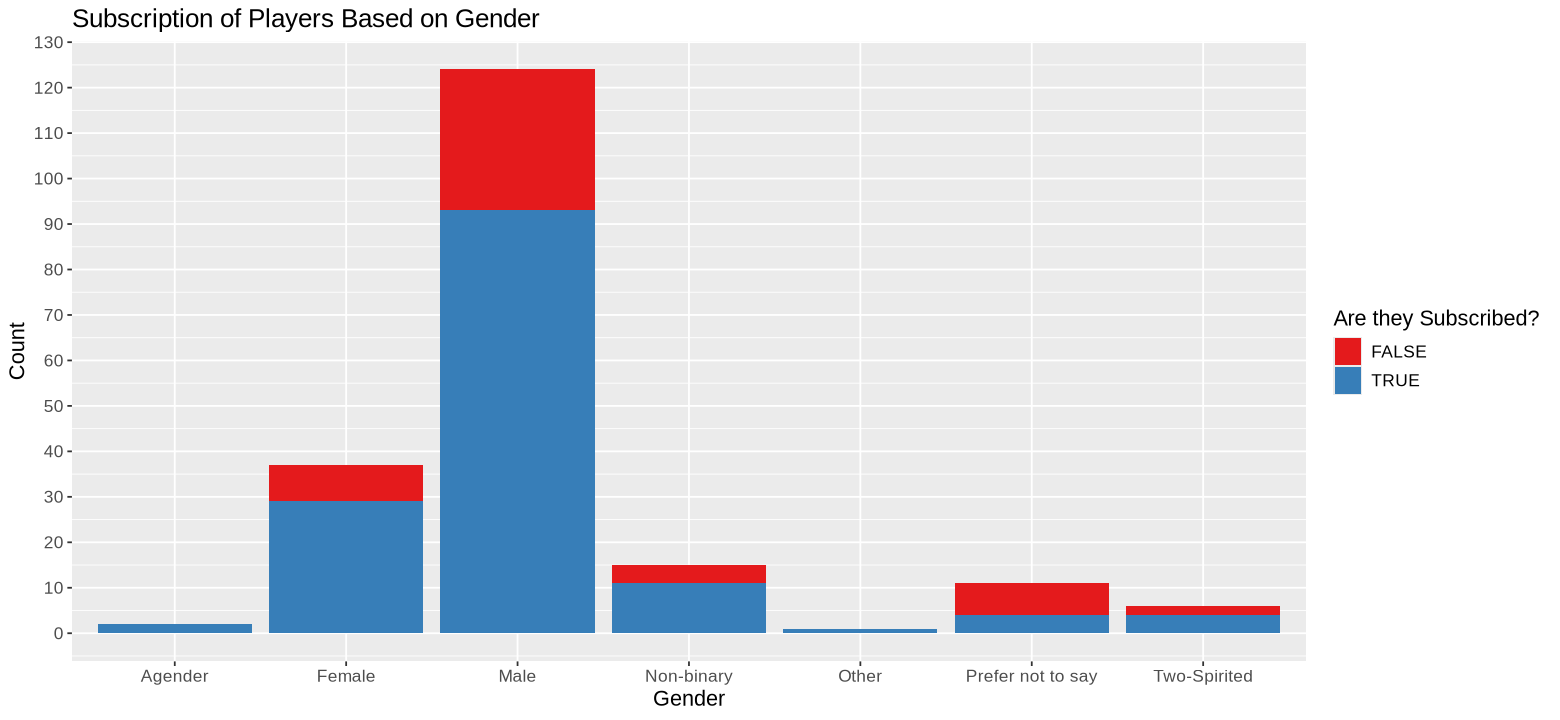

In [65]:
options(repr.plot.width = 13, repr.plot.height = 6)

gender_bar <- ggplot(players_data, aes(x = gender, fill = subscribe)) +
                geom_bar(position = "stack") +
                labs(x = "Gender", y = "Count", fill = "Are they Subscribed?") +
                ggtitle("Subscription of Players Based on Gender") +
                scale_fill_brewer(palette = "Set1") +
                scale_y_continuous(breaks = seq(0, 130, by = 10)) +
                theme(text = element_text(size = 13))
gender_bar

We can see that the majority of PlaiCraft players identify as male, with female coming in second, and non-binary coming in third. Overall, for the majority of the gender categories, more than half of each count of players are subscribed to PlaiCraft's newsletter. 

#### Visualization #7

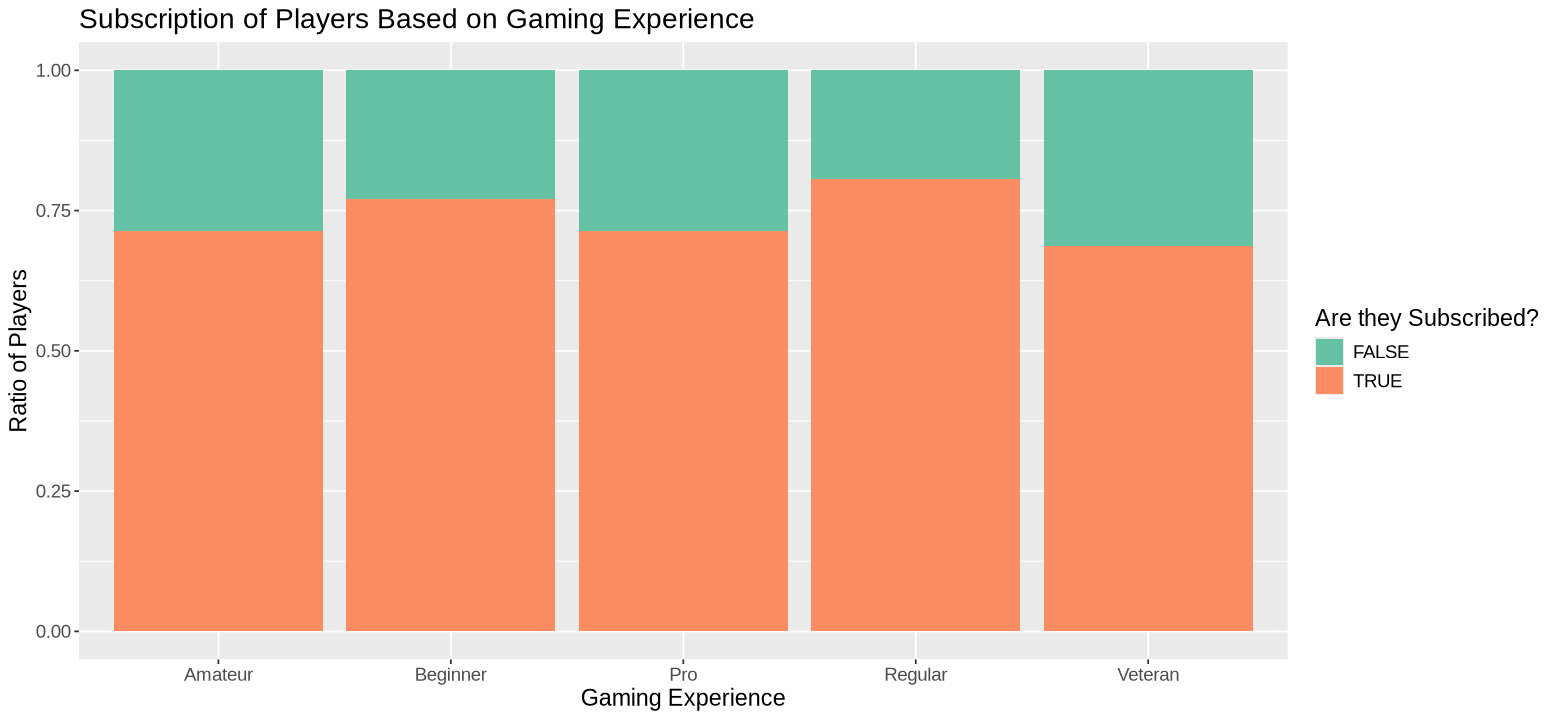

In [66]:
options(repr.plot.width = 13, repr.plot.height = 6)
experience_subscribe_bar <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
                                geom_bar(position = "fill") +
                                labs(x = "Gaming Experience", y = "Ratio of Players", fill = "Are they Subscribed?") +
                                ggtitle("Subscription of Players Based on Gaming Experience") +
                                scale_fill_brewer(palette = "Set2") +
                                theme(text= element_text(size = 14))
experience_subscribe_bar

It seems like regular players are most likely to subscribe to PlaiCraft's newsletter compared to the other gaming experiences. Although, across all gaming experiences, there are similar proportions of subscribed and not subscribed.

### 4. Methods and Plans

To adress my question, I would use non-linear KNN regression. Briefly, I would work with both datasets as they both contain relevant variables I need; played_hours, Age, and I can create a new column grouped by hashedEmail for the total number of sessions played since each hashedEmail is unique to each player. Thus, I would get the total number of sessions for each player this way. Then, I will do necessary training and validation of the data to create an optimal KNN non-linear regression model. 

KNN regression is appropriate because I want to predict a numerical value. KNN classification is for categorical predictions. Judging by visualization (), it doesn't seem like the variables have a linear relationship with each other, so linear regression is not preferred. Using the explanatory variable, "start_time", and response variable, total players online, the goal is to efficiently input any numerical time of day (ex. 18.5 = 6:30pm) and the classifier will output a prediction of total players online at that time. Then, I can decide if the number of players online is exceeding the number of licenses at hand and decide what the best course of action for license release is.

Fortunately, non-linear regression doesn't require much assumptions compared to linear regression where it assumes that the data is linear. A reason for its minimal assumptions is due to its nearest neighbours system. However, one setback is that its predictions can be inaccurate when predicting observations outside the range of its training data. Moreover, the larger the dataset, the longer it takes to compute the output. Fortunately, this dataset is not too large, so computing should not be an issue. However, it can become a problem for when more data is added to get a more accurate outcome. 

##### *To process the data, I will follow the general steps for creating a non-linear knn regression model. I will list the general steps and make notes of specific changes below:*
1. Combine the two datasets as shown in Part 1, inspect data and handle missing values and problems appropriately
2. Split dataset
    - 75% training and 25% testing.
3. Tune the training set
    - weight_func = "rectangular" in *nearest_neighbor()*, set mode to "regression" and engine to "kknn"
    - In recipe: response variable = total_hours, explanatory variable = Age + total_number_of_sessions
        - Scale the variables with *step_scale* and *step_center*
4. Cross validation on training set
        - 5 folds
    - Make a tibble with range of neighbors from 1 to 196
        - Neighbors differ by 4; ex. neighbors = 1, 5,... 196
    - Create workflow and use *tune_grid* and *collect_metrics*
5. Filter and slice for optimal *k*
6. Assess on testing data by making new knn model and workflow, then using *predict* and *bind_cols*, and collect metrics
7. Compare RMSPE to cross-validation RMSE
8. Use the optimal *k* and fit into original dataset to create final model

### GitHub Repository

https://github.com/tchan0717/dsci-100-2025w1-group-36.git

### References

Wickham, Hadley, and Garrett Grolemund. 2016. R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O’Reilly. https://r4ds.had.co.nz/.
\
\
The Pacific Laboratory of Artificial Intelligence. FAQ. Plaicraft. https://plaicraft.ai/faq. 